In [1]:
#pip install datasets
#pip install numpy
#pip install pandas
#pip install seaborn
#pip install scikit-learn
#pip install openpyxl
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from datasets import load_dataset

In [2]:
df = pd.read_excel('BBDD.xlsx')

In [3]:
df.head()

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


In [4]:
df

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo
...,...,...,...,...
49995,I thought this movie did a down right good job...,Pensé que esta película hizo un buen trabajo a...,positive,positivo
49996,"Bad plot, bad dialogue, bad acting, idiotic di...","Mala parcela, mal diálogo, mala actuación, dir...",negative,negativo
49997,I am a Catholic taught in parochial elementary...,Soy católica enseñada en escuelas primarias pa...,negative,negativo
49998,I'm going to have to disagree with the previou...,Voy a tener que estar en desacuerdo con el com...,negative,negativo


In [5]:
#filtrado en español
df = df[['sentimiento', 'review_es']].copy()

In [6]:
df.head()

,sentimiento,review_es
0,positivo,Uno de los otros críticos ha mencionado que de...
1,positivo,Una pequeña pequeña producción.La técnica de f...
2,positivo,Pensé que esta era una manera maravillosa de p...
3,negativo,"Básicamente, hay una familia donde un niño peq..."
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una..."


<Axes: >

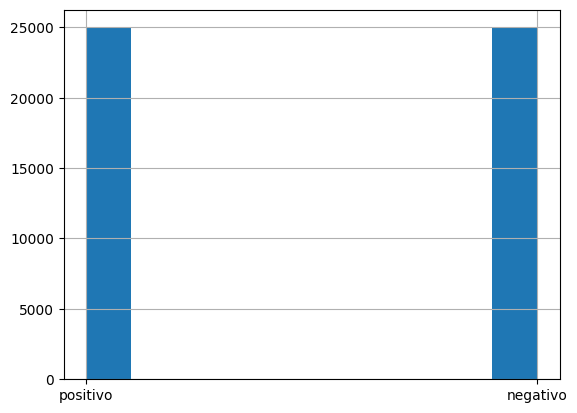

In [7]:
#histograma de sentiminetos de BD
df['sentimiento'].hist()

In [8]:
#etiqueta enumerdad para sentiminto
target_map = {'positivo': 1, 'negativo': 0}
df['target'] = df['sentimiento'].map(target_map)

In [9]:
df.head()

,sentimiento,review_es,target
0,positivo,Uno de los otros críticos ha mencionado que de...,1
1,positivo,Una pequeña pequeña producción.La técnica de f...,1
2,positivo,Pensé que esta era una manera maravillosa de p...,1
3,negativo,"Básicamente, hay una familia donde un niño peq...",0
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una...",1


In [10]:
#definir y dividir datos de prueba y datos de entrenamiento
df_train, df_test = train_test_split(df)

In [11]:
#75%
df_train

,sentimiento,review_es,target
4560,negativo,El cortador de galletas llega a trabajar horas...,0
44738,positivo,Tiendo a ser furioso al escuchar sobre la repu...,1
12673,positivo,"Esto es gracioso (bueno, excepto cuando Bruce ...",1
31813,positivo,"Un VG Brit ROM-COM, uno para ver si puede obte...",1
34295,negativo,Es raro ver la película que huelga en todos lo...,0
...,...,...,...
22134,positivo,Este es el tipo de película que Hollywood nece...,1
33241,positivo,Esta fue la tercera vez que intenté ver esta p...,1
2818,negativo,¿Sabes cómo a veces puedes ver una película de...,0
10574,negativo,Primero debo confesar que una paz separada es ...,0


In [12]:
#25%
df_test

,sentimiento,review_es,target
4008,positivo,Esta película hizo una estrella de John Glover...,1
48770,positivo,Creo que esta es una de las mejores películas ...,1
32257,negativo,Parece que ha habido algo de dinero detrás de ...,0
22092,negativo,"La película es agradable bien imaginada, pero ...",0
23622,positivo,Los productores de esta imagen son húngaros. N...,1
...,...,...,...
4503,negativo,El hecho de que una película esté en DVD no ga...,0
48311,negativo,Alquilé una copia de esta de Netflix - Gran er...,0
18883,positivo,Esta secuela demuestra que Tim Burton fue para...,1
9537,positivo,Blondell & Farrell son excelentes.Blondell era...,1


In [13]:
#apluicar funcion vertorizar
vectorizer = TfidfVectorizer(max_features=2000)

In [14]:
#vetorizar conjunto de entrenamiento
X_train = vectorizer.fit_transform(df_train['review_es'])

In [15]:
X_train

<37500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3460653 stored elements in Compressed Sparse Row format>

In [16]:
#hacer lo mismo con test
X_test = vectorizer.transform(df_test['review_es'])
X_test

<12500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1158600 stored elements in Compressed Sparse Row format>

In [17]:
#guardar datos de target en varaibles para entrenamiento y test
Y_train = df_train['target']
Y_test = df_test['target']

In [18]:
#modelo con regrecion logistica con cantidad de interacciones
model = LogisticRegression(max_iter=1000)
#entranar modelo
model.fit(X_train, Y_train)
#imprimir precicion de datos de prueba y datos de entrenamiento}
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8794666666666666
Test acc: 0.86064


In [19]:
#corre modleo para matriz de confuncion
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [20]:
#matriz
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.86830417, 0.13169583],
       [0.1094456 , 0.8905544 ]])

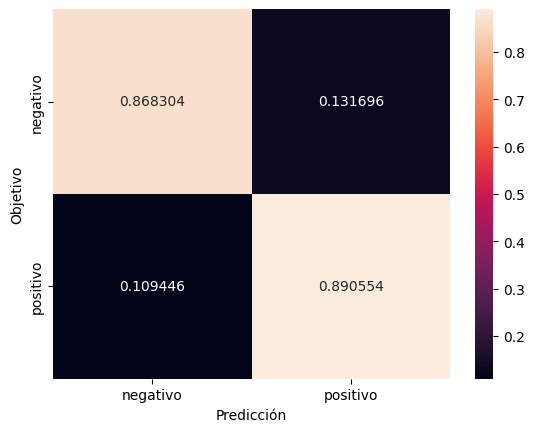

In [21]:
#graficar modelo de confucion train
def plot_cm(cm):
    classes = ['negativo', 'positivo']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Objetivo")

plot_cm(cm)

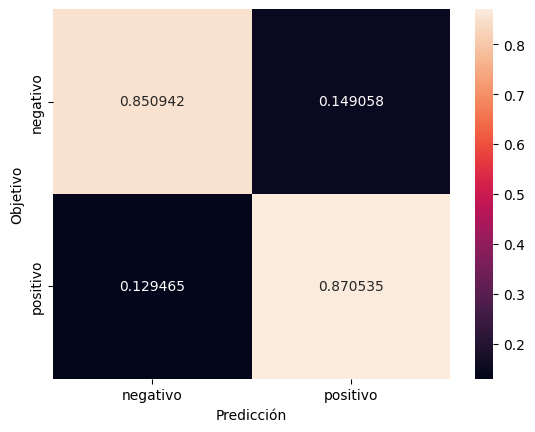

In [22]:
#graficar modelo de confucion train test
cm = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm)

In [23]:
#mapeo de palabras
word_index_map = vectorizer.vocabulary_
word_index_map

{'el': 566,
 'de': 436,
 'llega': 1061,
 'trabajar': 1842,
 'horas': 903,
 'en': 581,
 'esta': 663,
 'historia': 892,
 'amor': 98,
 'no': 1254,
 'original': 1315,
 'la': 1027,
 'trama': 1847,
 'como': 336,
 'es': 619,
 'se': 1622,
 'ha': 834,
 'antes': 110,
 'un': 1872,
 'tiempos': 1808,
 'por': 1439,
 'lo': 1070,
 'que': 1516,
 'hay': 864,
 'necesidad': 1234,
 'nada': 1226,
 'eso': 641,
 'con': 349,
 'decir': 450,
 'las': 1033,
 'chicas': 288,
 '12': 4,
 'años': 165,
 'película': 1369,
 'mientras': 1160,
 'resto': 1572,
 'nosotros': 1262,
 'obligado': 1286,
 'hacer': 851,
 'una': 1873,
 'cara': 259,
 'incluso': 947,
 'banda': 172,
 'sonora': 1707,
 'horrible': 904,
 'me': 1136,
 'gusta': 826,
 'figura': 752,
 'aunque': 156,
 'películas': 1370,
 'malas': 1104,
 'ser': 1651,
 'al': 65,
 'escuchar': 635,
 'sobre': 1695,
 'director': 506,
 'muy': 1220,
 'menudo': 1151,
 'cineasta': 303,
 'sin': 1685,
 'talento': 1751,
 'solo': 1702,
 'para': 1342,
 'audiencias': 155,
 'imágenes': 944,
 's

In [24]:
#palabras mas psotivas usando coef
corte = 4

print("Palabras más positivas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > corte:
        print(word, weight)

Palabras más positivas:
mejores 4.218705484131623
excelente 8.22638840197898
disfruté 4.394864575841062
hoy 4.298726940911274
increíble 4.2202247069506695
definitivamente 4.485861264891167
perfecto 4.403993666818989
maravillosa 4.426505073989137
hilarante 4.120958179161138
encantó 5.019647687592008


In [25]:
#palbras mas negativas
print("Palabras más negativas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -corte:
        print(word, weight)

Palabras más negativas:
no -4.311161854030322
horrible -9.606126420236865
aburrida -6.888875367026608
mala -7.760806516785905
peor -10.865289352211791
minutos -4.58184085602977
terrible -7.906299346411582
siquiera -4.138106527156499
aburrido -6.822028450147764
malo -4.258774093736672
decepción -5.22090367939797
peores -7.482983246080411
desafortunadamente -4.6979439245724395
basura -4.889808556230514
pobre -5.535339226743783
mal -5.755801793290905
mierda -4.029643698786613
decepcionante -4.81253474751085
estúpida -4.407420529818483


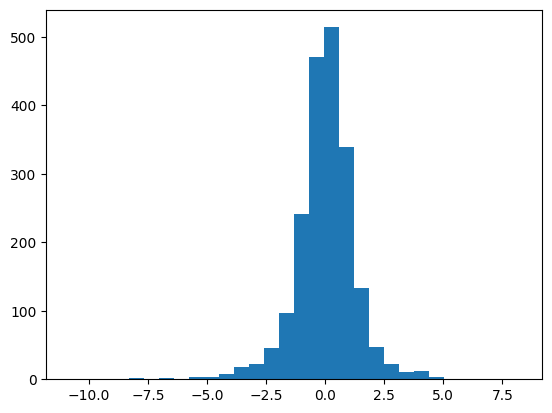

In [26]:
#histograma de palabras y peso
plt.hist(model.coef_[0], bins=30);

In [27]:
#test dek modelo
prueba = ["Entretenida. La protagonista hace una buena actuación. No es una enchufada por ser hija de padres actores."]

# Transformar la entrada con el vectorizador
x = vectorizer.transform(prueba)

In [28]:
# Predecir con el modelo
P = model.predict(x)

In [29]:
# Obtener las clases del modelo
clases = model.classes_

In [30]:
# Mostrar la clase predicha
for i in range (len(prueba)):
    if clases[P[i]] == 0:
        print(f"el Comentario: '{prueba[i]}' es: Negativo")
    else:
        print(f"el Comentario: '{prueba[i]}' es: Positivo")

el Comentario: 'Entretenida. La protagonista hace una buena actuación. No es una enchufada por ser hija de padres actores.' es: Positivo
